In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Pre-process

In [2]:
# Import Alphabet Soup Charity dataset
charity_df = pd.read_csv("charity_data.csv")
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Check datatypes
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Count unique object values in each column
charity_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Count distinct values in "INCOME_AMT"
charity_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [6]:
# Create "INCOME_AMT_BIN" column
charity_df.insert(2, "INCOME_AMT_BIN", charity_df.INCOME_AMT)

In [7]:
# Convert "INCOME_AMT_BIN" values
charity_df["INCOME_AMT_BIN"] = charity_df["INCOME_AMT_BIN"].map(
    {"25000-99999": "25000-99999", "100000-499999": "100000-499999", "1-9999": "1-9999", "10000-24999": "10000-24999",
        "1M-5M": "1000000-5000000", "10M-50M": "10000000-50000000", "5M-10M": "5000000-10000000", "50M+": "50000001"}
)

charity_df.INCOME_AMT_BIN.value_counts()

25000-99999          3747
100000-499999        3374
1000000-5000000       955
1-9999                728
10000-24999           543
10000000-50000000     240
5000000-10000000      185
50000001              139
Name: INCOME_AMT_BIN, dtype: int64

In [8]:
# Keep rows where "INCOME_AMT_BIN" is not NaN
charity_df = charity_df[charity_df["INCOME_AMT_BIN"].notna()]
charity_df

,EIN,NAME,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1-9999,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,100000-499999,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,100000-499999,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,10000000-50000000,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34284,990355149,HABITAT FOR HUMANITY INTERNATIONAL INC,1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34287,990371761,KENNESAW DREAM FOUNDATION INC,25000-99999,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1
34289,990382020,SOLEA WATER,25000-99999,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1
34290,996006031,DISABLED AMERICAN VETERANS,1-9999,T4,CompanySponsored,C3000,Preservation,Association,1,1-9999,N,5000,0


In [9]:
# Create "ASK_AMT_BIN" column
charity_df.insert(2, "ASK_AMT_BIN", charity_df.ASK_AMT)
charity_df["ASK_AMT_BIN"].dtypes

dtype('int64')

In [10]:
# Cut and bin "ASK_AMOUNT" column
charity_df["ASK_AMT_BIN"] = pd.cut(charity_df["ASK_AMT_BIN"], 
                               bins=[0, 250000, 500000, 750000, 1000000,
                                     2500000, 5000000, 7500000, 10000000, 
                                     25000000, 50000000, 75000000, 100000000, 
                                     250000000, 500000000, 750000000, 1000000000, 
                                     2500000000, 5000000000, 7500000000, 10000000000]
                              )

C:\Users\Dell PC\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
# Count "ASK_AMT" bins
pd.value_counts(charity_df["ASK_AMT_BIN"])

(0, 250000]                  6835
(250000, 500000]              857
(1000000, 2500000]            612
(500000, 750000]              387
(2500000, 5000000]            324
(750000, 1000000]             261
(5000000, 7500000]            162
(10000000, 25000000]          156
(25000000, 50000000]          100
(7500000, 10000000]            63
(100000000, 250000000]         44
(50000000, 75000000]           32
(75000000, 100000000]          21
(250000000, 500000000]         18
(1000000000, 2500000000]       13
(500000000, 750000000]         12
(750000000, 1000000000]         9
(2500000000, 5000000000]        2
(7500000000, 10000000000]       2
(5000000000, 7500000000]        1
Name: ASK_AMT_BIN, dtype: int64

In [12]:
# Change "ASK_AMT" to "50000001" if "ASK_AMT" > 50000000
charity_df.loc[charity_df.ASK_AMT > 5000000, "ASK_AMT"] = 5000001

C:\Users\Dell PC\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
# "CLASSIFICATION" value counts
CLASSIFICATION_counts = charity_df.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    5645
C2000    1637
C1200    1078
C3000     456
C2100     339
C7000     325
C4000      89
C1700      79
C2800      37
C2700      37
C1270      32
C1300      19
C7100      15
C7200      13
C1400      12
C1800      12
C1500      11
C5000      10
C7120      10
C1240       7
C8000       7
C2300       4
C1280       4
C7210       3
C1238       2
C1250       2
C4100       2
C2400       2
C8200       2
C2710       2
C2570       1
C0          1
C1820       1
C5200       1
C3200       1
C2561       1
C2170       1
C1234       1
C1257       1
C6000       1
C1230       1
C1900       1
C1237       1
C8210       1
C1235       1
C1600       1
C1256       1
C1245       1
Name: CLASSIFICATION, dtype: int64

In [14]:
# Filter for "CLASSIFICATION_counts" values to replace
replace_CLASSIFICATION = list(CLASSIFICATION_counts[CLASSIFICATION_counts<1000].index)

In [15]:
# Bin above to "Other"
for CLASSIFICATION_counts in replace_CLASSIFICATION:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(CLASSIFICATION_counts, "Other")
    
# Check binning
charity_df.CLASSIFICATION.value_counts()

C:\Users\Dell PC\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C1000    5645
C2000    1637
Other    1551
C1200    1078
Name: CLASSIFICATION, dtype: int64

In [19]:
# "APPLICATION_TYPE" value counts
APPLICATION_TYPE_counts = charity_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_counts

T3     8412
T6      406
T5      314
T4      265
T9      146
T7      130
T8       87
T19      81
T10      24
T12      14
T13      12
T2        9
T25       3
T14       3
T15       2
T29       2
T17       1
Name: APPLICATION_TYPE, dtype: int64

In [20]:
# Filter for "APPLICATION_TYPE_counts" values to replace
replace_APPLICATION_TYPE = list(APPLICATION_TYPE_counts[APPLICATION_TYPE_counts<1000].index)

In [21]:
# Bin above to "Other"
for APPLICATION_TYPE_counts in replace_APPLICATION_TYPE:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(APPLICATION_TYPE_counts, "Other")
    
# Check binning
charity_df.APPLICATION_TYPE.value_counts()

T3       8412
Other    1499
Name: APPLICATION_TYPE, dtype: int64

In [24]:
# Create "CLASS_APP_TYPE" column - bin "CLASSIFICATION" and "APPLICATION_TYPE" columns
class_column = charity_df["CLASSIFICATION"]
app_column = charity_df["APPLICATION_TYPE"]

charity_df.insert(2, "CLASS_APP_TYPE", 
                  "(" + class_column + "," + app_column + "]"
                       )

In [25]:
# Count distinct values in "CLASS_APP_TYPE"
charity_df.CLASS_APP_TYPE.value_counts()

(C1000,T3]       4890
(C2000,T3]       1364
(Other,T3]       1084
(C1200,T3]       1074
(C1000,Other]     755
(Other,Other]     467
(C2000,Other]     273
(C1200,Other]       4
Name: CLASS_APP_TYPE, dtype: int64

In [26]:
# Create column for "CLASS_APP_TYPE" value counts
charity_df["CLASS_APP_TYPE_freq"] = charity_df.groupby(by="CLASS_APP_TYPE")["CLASS_APP_TYPE"].transform("count")
charity_df

C:\Users\Dell PC\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,EIN,NAME,CLASS_APP_TYPE,ASK_AMT_BIN,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,CLASS_APP_TYPE_freq
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,"(C2000,T3]","(0, 250000]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1364
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,"(C2000,T3]","(0, 250000]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,1364
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,"(C1000,T3]","(0, 250000]",100000-499999,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,4890
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,"(C1000,T3]","(0, 250000]",100000-499999,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1,4890
7,10566033,ISRAEL EMERGENCY ALLIANCE,"(C2000,T3]","(7500000, 10000000]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,5000001,1,1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34284,990355149,HABITAT FOR HUMANITY INTERNATIONAL INC,"(C1000,T3]","(2500000, 5000000]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0,4890
34287,990371761,KENNESAW DREAM FOUNDATION INC,"(C1200,T3]","(0, 250000]",25000-99999,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1,1074
34289,990382020,SOLEA WATER,"(C1000,T3]","(0, 250000]",25000-99999,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1,4890
34290,996006031,DISABLED AMERICAN VETERANS,"(Other,Other]","(0, 250000]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1,1-9999,N,5000,0,467


In [27]:
# Change "CLASS_APP_TYPE" to "(Other,Other]" if "CLASS_APP_TYPE_freq" < 100
charity_df.loc[charity_df.CLASS_APP_TYPE_freq < 300, "CLASS_APP_TYPE"] = "(Other,Other]"

charity_df.CLASS_APP_TYPE.value_counts()

C:\Users\Dell PC\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(C1000,T3]       4890
(C2000,T3]       1364
(Other,T3]       1084
(C1200,T3]       1074
(C1000,Other]     755
(Other,Other]     744
Name: CLASS_APP_TYPE, dtype: int64

In [28]:
# Create copy of "charity_df"
charity_df1 = charity_df
charity_df1

,EIN,NAME,CLASS_APP_TYPE,ASK_AMT_BIN,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,CLASS_APP_TYPE_freq
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,"(C2000,T3]","(0, 250000]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1364
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,"(C2000,T3]","(0, 250000]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,1364
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,"(C1000,T3]","(0, 250000]",100000-499999,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,4890
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,"(C1000,T3]","(0, 250000]",100000-499999,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1,4890
7,10566033,ISRAEL EMERGENCY ALLIANCE,"(C2000,T3]","(7500000, 10000000]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,5000001,1,1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34284,990355149,HABITAT FOR HUMANITY INTERNATIONAL INC,"(C1000,T3]","(2500000, 5000000]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0,4890
34287,990371761,KENNESAW DREAM FOUNDATION INC,"(C1200,T3]","(0, 250000]",25000-99999,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1,1074
34289,990382020,SOLEA WATER,"(C1000,T3]","(0, 250000]",25000-99999,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1,4890
34290,996006031,DISABLED AMERICAN VETERANS,"(Other,Other]","(0, 250000]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1,1-9999,N,5000,0,467


In [29]:
# Drop columns
charity_df1 = charity_df1.drop(columns=
                               ["EIN", "NAME", "ASK_AMT_BIN", "CLASS_APP_TYPE_freq"]
                              )
charity_df1

,CLASS_APP_TYPE,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,"(C2000,T3]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
3,"(C2000,T3]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,"(C1000,T3]",100000-499999,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
6,"(C1000,T3]",100000-499999,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,"(C2000,T3]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,5000001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34284,"(C1000,T3]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34287,"(C1200,T3]",25000-99999,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1
34289,"(C1000,T3]",25000-99999,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1
34290,"(Other,Other]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1,1-9999,N,5000,0


In [30]:
# Reorder "IS_SUCCESSFUL" column
column_0 = charity_df1.pop("IS_SUCCESSFUL")
charity_df1.insert(0, "IS_SUCCESSFUL", column_0)
charity_df1

,IS_SUCCESSFUL,CLASS_APP_TYPE,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
1,1,"(C2000,T3]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590
3,1,"(C2000,T3]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692
4,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590
6,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452
7,1,"(C2000,T3]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,5000001
...,...,...,...,...,...,...,...,...,...,...,...,...
34284,0,"(C1000,T3]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856
34287,1,"(C1200,T3]",25000-99999,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713
34289,1,"(C1000,T3]",25000-99999,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197
34290,0,"(Other,Other]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1,1-9999,N,5000


In [31]:
# Create "IS_SUCCESSFUL1" column
charity_df1.insert(0, "IS_SUCCESSFUL1", charity_df1.IS_SUCCESSFUL)

In [32]:
# Convert "IS_SUCCESSFUL1" column to str
charity_df1["IS_SUCCESSFUL1"] = charity_df1["IS_SUCCESSFUL1"].astype(str)

charity_df1["IS_SUCCESSFUL1"].dtypes

dtype('O')

In [33]:
# Convert "IS_SUCCESSFUL1" column values
charity_df1["IS_SUCCESSFUL1"] = charity_df1["IS_SUCCESSFUL1"].replace(
    ["0", "1"],["N", "Y"]
)

charity_df1  

,IS_SUCCESSFUL1,IS_SUCCESSFUL,CLASS_APP_TYPE,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
1,Y,1,"(C2000,T3]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590
3,Y,1,"(C2000,T3]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692
4,Y,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590
6,Y,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452
7,Y,1,"(C2000,T3]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,5000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34284,N,0,"(C1000,T3]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856
34287,Y,1,"(C1200,T3]",25000-99999,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713
34289,Y,1,"(C1000,T3]",25000-99999,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197
34290,N,0,"(Other,Other]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1,1-9999,N,5000


In [34]:
# Drop "IS_SUCCESSFUL" column
charity_df1 = charity_df1.drop(columns=["IS_SUCCESSFUL"])
charity_df1

,IS_SUCCESSFUL1,CLASS_APP_TYPE,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
1,Y,"(C2000,T3]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590
3,Y,"(C2000,T3]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692
4,Y,"(C1000,T3]",100000-499999,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590
6,Y,"(C1000,T3]",100000-499999,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452
7,Y,"(C2000,T3]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,5000001
...,...,...,...,...,...,...,...,...,...,...,...,...
34284,N,"(C1000,T3]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856
34287,Y,"(C1200,T3]",25000-99999,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713
34289,Y,"(C1000,T3]",25000-99999,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197
34290,N,"(Other,Other]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1,1-9999,N,5000


In [35]:
# Reorder "STATUS" column
column_1 = charity_df1.pop("STATUS")
charity_df1.insert(1, "STATUS", column_1)
charity_df1

,IS_SUCCESSFUL1,STATUS,CLASS_APP_TYPE,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
1,Y,1,"(C2000,T3]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590
3,Y,1,"(C2000,T3]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692
4,Y,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590
6,Y,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Preservation,Trust,100000-499999,N,31452
7,Y,1,"(C2000,T3]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,10M-50M,N,5000001
...,...,...,...,...,...,...,...,...,...,...,...,...
34284,N,1,"(C1000,T3]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1M-5M,N,3384856
34287,Y,1,"(C1200,T3]",25000-99999,T3,Independent,C1200,Preservation,Trust,25000-99999,N,6713
34289,Y,1,"(C1000,T3]",25000-99999,T3,Independent,C1000,Preservation,Trust,25000-99999,N,20197
34290,N,1,"(Other,Other]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1-9999,N,5000


In [36]:
# Create "STATUS1" column
charity_df1.insert(1, "STATUS1", charity_df1.STATUS)

In [37]:
# Convert "STATUS1" column to str
charity_df1["STATUS1"] = charity_df1["STATUS1"].astype(str)

charity_df1["STATUS1"].dtypes

dtype('O')

In [38]:
# Convert "STATUS1" column values
charity_df1["STATUS1"] = charity_df1["STATUS1"].replace(
    ["0", "1"],["Not Active", "Active"]
)

charity_df1

,IS_SUCCESSFUL1,STATUS1,STATUS,CLASS_APP_TYPE,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
1,Y,Active,1,"(C2000,T3]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590
3,Y,Active,1,"(C2000,T3]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692
4,Y,Active,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590
6,Y,Active,1,"(C1000,T3]",100000-499999,T3,Independent,C1000,Preservation,Trust,100000-499999,N,31452
7,Y,Active,1,"(C2000,T3]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,10M-50M,N,5000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34284,N,Active,1,"(C1000,T3]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1M-5M,N,3384856
34287,Y,Active,1,"(C1200,T3]",25000-99999,T3,Independent,C1200,Preservation,Trust,25000-99999,N,6713
34289,Y,Active,1,"(C1000,T3]",25000-99999,T3,Independent,C1000,Preservation,Trust,25000-99999,N,20197
34290,N,Active,1,"(Other,Other]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1-9999,N,5000


In [39]:
# Drop "STATUS" column
charity_df1 = charity_df1.drop(columns=["STATUS"])
charity_df1

,IS_SUCCESSFUL1,STATUS1,CLASS_APP_TYPE,INCOME_AMT_BIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
1,Y,Active,"(C2000,T3]",1-9999,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590
3,Y,Active,"(C2000,T3]",10000-24999,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692
4,Y,Active,"(C1000,T3]",100000-499999,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590
6,Y,Active,"(C1000,T3]",100000-499999,T3,Independent,C1000,Preservation,Trust,100000-499999,N,31452
7,Y,Active,"(C2000,T3]",10000000-50000000,T3,Independent,C2000,Preservation,Trust,10M-50M,N,5000001
...,...,...,...,...,...,...,...,...,...,...,...,...
34284,N,Active,"(C1000,T3]",1000000-5000000,T3,CompanySponsored,C1000,Preservation,Association,1M-5M,N,3384856
34287,Y,Active,"(C1200,T3]",25000-99999,T3,Independent,C1200,Preservation,Trust,25000-99999,N,6713
34289,Y,Active,"(C1000,T3]",25000-99999,T3,Independent,C1000,Preservation,Trust,25000-99999,N,20197
34290,N,Active,"(Other,Other]",1-9999,Other,CompanySponsored,Other,Preservation,Association,1-9999,N,5000


In [40]:
# Check datatypes
charity_df1.dtypes

IS_SUCCESSFUL1            object
STATUS1                   object
CLASS_APP_TYPE            object
INCOME_AMT_BIN            object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
dtype: object

In [41]:
# Generate categorical variable list and count unique object values in each column
charity_df1_cat = charity_df1.dtypes[charity_df1.dtypes == "object"].index.tolist()
charity_df1[charity_df1_cat].nunique()

IS_SUCCESSFUL1            2
STATUS1                   2
CLASS_APP_TYPE            6
INCOME_AMT_BIN            8
APPLICATION_TYPE          2
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                8
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [42]:
# Create a OneHotEncoder instance
One_Hot_Encoder = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using categorical variable list
One_Hot_Encoder_df = pd.DataFrame(One_Hot_Encoder.fit_transform(charity_df1[charity_df1_cat]))

# Add the encoded variable names to DataFrame
One_Hot_Encoder_df.columns = One_Hot_Encoder.get_feature_names(charity_df1_cat)
One_Hot_Encoder_df

,IS_SUCCESSFUL1_N,IS_SUCCESSFUL1_Y,STATUS1_Active,STATUS1_Not Active,"CLASS_APP_TYPE_(C1000,Other]","CLASS_APP_TYPE_(C1000,T3]","CLASS_APP_TYPE_(C1200,T3]","CLASS_APP_TYPE_(C2000,T3]","CLASS_APP_TYPE_(Other,Other]","CLASS_APP_TYPE_(Other,T3]",...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9907,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9908,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# Merge one-hot encoded features and drop originals
charity_df1 = charity_df1.merge(One_Hot_Encoder_df, left_index=True, right_index=True)
charity_df1 = charity_df1.drop(charity_df1_cat,1)
charity_df1

,ASK_AMT,IS_SUCCESSFUL1_N,IS_SUCCESSFUL1_Y,STATUS1_Active,STATUS1_Not Active,"CLASS_APP_TYPE_(C1000,Other]","CLASS_APP_TYPE_(C1000,T3]","CLASS_APP_TYPE_(C1200,T3]","CLASS_APP_TYPE_(C2000,T3]","CLASS_APP_TYPE_(Other,Other]",...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
1,108590,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,31452,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,5000001,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,77822,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9907,625855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9908,5000001,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9909,20136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
# Split into features and target arrays
y = charity_df1["IS_SUCCESSFUL1_Y"].values
X = charity_df1.drop(["IS_SUCCESSFUL1_Y","IS_SUCCESSFUL1_N"],1).values

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Create StandardScaler instance
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Neural Network / Keras model for Test Dataset

In [46]:
# Define Keras model
neural_network_model = tf.keras.models.Sequential()

# Layers
num_input_features = len(X_test_scaled[0])
neural_network_model.add(Dense(100, input_dim=num_input_features, activation="relu"))
neural_network_model.add(Dense(50, activation="relu"))
neural_network_model.add(Dense(1, activation="sigmoid"))

neural_network_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4900      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile Sequential model
neural_network_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model = neural_network_model.fit(X_test_scaled, y_test, epochs=300)

Epoch 1/300
22/22 [==============================] - 0s 998us/step - loss: 0.6670 - accuracy: 0.6066
Epoch 2/300
22/22 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6902
Epoch 3/300
22/22 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6974
Epoch 4/300
22/22 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.7003
Epoch 5/300
22/22 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7133
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7233
Epoch 7/300
22/22 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7219
Epoch 8/300
22/22 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7248
Epoch 9/300
22/22 [==============================] - 0s 952us/step - loss: 0.5486 - accuracy: 0.7233
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.7291
Epoch

22/22 [==============================] - 0s 952us/step - loss: 0.4737 - accuracy: 0.7594
Epoch 83/300
22/22 [==============================] - 0s 997us/step - loss: 0.4748 - accuracy: 0.7565
Epoch 84/300
22/22 [==============================] - 0s 966us/step - loss: 0.4728 - accuracy: 0.7550
Epoch 85/300
22/22 [==============================] - 0s 949us/step - loss: 0.4708 - accuracy: 0.7622
Epoch 86/300
22/22 [==============================] - 0s 865us/step - loss: 0.4748 - accuracy: 0.7622
Epoch 87/300
22/22 [==============================] - 0s 816us/step - loss: 0.4713 - accuracy: 0.7594
Epoch 88/300
22/22 [==============================] - 0s 952us/step - loss: 0.4714 - accuracy: 0.7608
Epoch 89/300
22/22 [==============================] - 0s 909us/step - loss: 0.4724 - accuracy: 0.7594
Epoch 90/300
22/22 [==============================] - 0s 861us/step - loss: 0.4699 - accuracy: 0.7579
Epoch 91/300
22/22 [==============================] - 0s 907us/step - loss: 0.4684 - accuracy: 

22/22 [==============================] - 0s 884us/step - loss: 0.4601 - accuracy: 0.7680
Epoch 162/300
22/22 [==============================] - 0s 907us/step - loss: 0.4564 - accuracy: 0.7608
Epoch 163/300
22/22 [==============================] - 0s 820us/step - loss: 0.4580 - accuracy: 0.7622
Epoch 164/300
22/22 [==============================] - 0s 906us/step - loss: 0.4577 - accuracy: 0.7709
Epoch 165/300
22/22 [==============================] - 0s 859us/step - loss: 0.4598 - accuracy: 0.7608
Epoch 166/300
22/22 [==============================] - 0s 864us/step - loss: 0.4553 - accuracy: 0.7637
Epoch 167/300
22/22 [==============================] - 0s 907us/step - loss: 0.4551 - accuracy: 0.7637
Epoch 168/300
22/22 [==============================] - 0s 881us/step - loss: 0.4606 - accuracy: 0.7637
Epoch 169/300
22/22 [==============================] - 0s 774us/step - loss: 0.4593 - accuracy: 0.7723
Epoch 170/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4546 - acc

22/22 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.7723
Epoch 242/300
22/22 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.7622
Epoch 243/300
22/22 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.7752
Epoch 244/300
22/22 [==============================] - 0s 965us/step - loss: 0.4476 - accuracy: 0.7651
Epoch 245/300
22/22 [==============================] - 0s 907us/step - loss: 0.4429 - accuracy: 0.7738
Epoch 246/300
22/22 [==============================] - 0s 907us/step - loss: 0.4474 - accuracy: 0.7695
Epoch 247/300
22/22 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.7666
Epoch 248/300
22/22 [==============================] - 0s 957us/step - loss: 0.4480 - accuracy: 0.7752
Epoch 249/300
22/22 [==============================] - 0s 861us/step - loss: 0.4489 - accuracy: 0.7781
Epoch 250/300
22/22 [==============================] - 0s 861us/step - loss: 0.4489 - accuracy:

In [48]:
# Data history
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


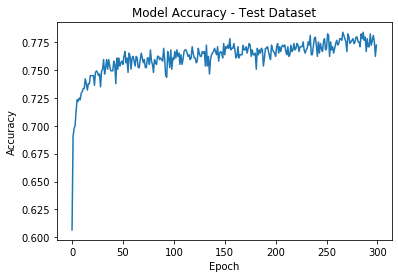

In [49]:
# Graph model accuracy
plt.plot(model.history["accuracy"])
plt.title("Model Accuracy - Test Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

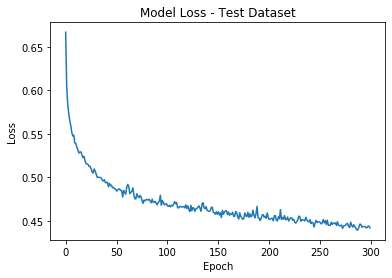

In [50]:
# Graph model loss
plt.plot(model.history["loss"])
plt.title("Model Loss - Test Dataset")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

# Neural Network / Keras model for Train Dataset

In [51]:
# Define Keras model
neural_network_model = tf.keras.models.Sequential()

# Layers
num_input_features = len(X_train_scaled[0])
neural_network_model.add(Dense(100, input_dim=num_input_features, activation="relu"))
neural_network_model.add(Dense(50, activation="relu"))
neural_network_model.add(Dense(1, activation="sigmoid"))

neural_network_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4900      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile Sequential model
neural_network_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model = neural_network_model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
65/65 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.6316
Epoch 2/500
65/65 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.6883
Epoch 3/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6926
Epoch 4/500
65/65 [==============================] - 0s 937us/step - loss: 0.5909 - accuracy: 0.7013
Epoch 5/500
65/65 [==============================] - 0s 951us/step - loss: 0.5874 - accuracy: 0.6955
Epoch 6/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7032
Epoch 7/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5827 - accuracy: 0.7023
Epoch 8/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7104
Epoch 9/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.7143
Epoch 10/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7080
Epoch

65/65 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7379
Epoch 83/500
65/65 [==============================] - 0s 844us/step - loss: 0.5294 - accuracy: 0.7354
Epoch 84/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7359
Epoch 85/500
65/65 [==============================] - 0s 895us/step - loss: 0.5296 - accuracy: 0.7369
Epoch 86/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7417
Epoch 87/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.7412
Epoch 88/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.7436
Epoch 89/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7335
Epoch 90/500
65/65 [==============================] - 0s 876us/step - loss: 0.5265 - accuracy: 0.7359
Epoch 91/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7374
Epoch 9

65/65 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7422
Epoch 164/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5145 - accuracy: 0.7436
Epoch 165/500
65/65 [==============================] - 0s 957us/step - loss: 0.5132 - accuracy: 0.7480
Epoch 166/500
65/65 [==============================] - 0s 959us/step - loss: 0.5125 - accuracy: 0.7412
Epoch 167/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.7422
Epoch 168/500
65/65 [==============================] - 0s 870us/step - loss: 0.5140 - accuracy: 0.7412
Epoch 169/500
65/65 [==============================] - 0s 949us/step - loss: 0.5118 - accuracy: 0.7398
Epoch 170/500
65/65 [==============================] - 0s 828us/step - loss: 0.5098 - accuracy: 0.7446
Epoch 171/500
65/65 [==============================] - 0s 897us/step - loss: 0.5103 - accuracy: 0.7431
Epoch 172/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy:

65/65 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7518
Epoch 244/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7446
Epoch 245/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7508
Epoch 246/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7460
Epoch 247/500
65/65 [==============================] - 0s 844us/step - loss: 0.4989 - accuracy: 0.7456
Epoch 248/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5041 - accuracy: 0.7446
Epoch 249/500
65/65 [==============================] - 0s 862us/step - loss: 0.5026 - accuracy: 0.7431
Epoch 250/500
65/65 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7460
Epoch 251/500
65/65 [==============================] - 0s 921us/step - loss: 0.5002 - accuracy: 0.7480
Epoch 252/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.752

65/65 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7456
Epoch 324/500
65/65 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7460
Epoch 325/500
65/65 [==============================] - 0s 869us/step - loss: 0.4957 - accuracy: 0.7518
Epoch 326/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7499
Epoch 327/500
65/65 [==============================] - 0s 874us/step - loss: 0.4924 - accuracy: 0.7489
Epoch 328/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7523
Epoch 329/500
65/65 [==============================] - 0s 875us/step - loss: 0.4961 - accuracy: 0.7523
Epoch 330/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7499
Epoch 331/500
65/65 [==============================] - 0s 814us/step - loss: 0.4908 - accuracy: 0.7537
Epoch 332/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7

65/65 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7547
Epoch 404/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7557
Epoch 405/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7513
Epoch 406/500
65/65 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7508
Epoch 407/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7547
Epoch 408/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7528
Epoch 409/500
65/65 [==============================] - 0s 913us/step - loss: 0.4853 - accuracy: 0.7513
Epoch 410/500
65/65 [==============================] - 0s 875us/step - loss: 0.4876 - accuracy: 0.7542
Epoch 411/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7542
Epoch 412/500
65/65 [==============================] - 0s 970us/step - loss: 0.4879 - accuracy: 0.754

65/65 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7537
Epoch 484/500
65/65 [==============================] - 0s 875us/step - loss: 0.4859 - accuracy: 0.7542
Epoch 485/500
65/65 [==============================] - 0s 936us/step - loss: 0.4834 - accuracy: 0.7542
Epoch 486/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7532
Epoch 487/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7566
Epoch 488/500
65/65 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7460
Epoch 489/500
65/65 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.7480
Epoch 490/500
65/65 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7537
Epoch 491/500
65/65 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7561
Epoch 492/500
65/65 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7581


In [53]:
# Data history
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


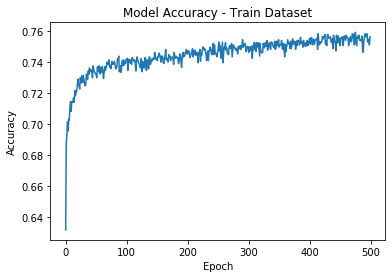

In [54]:
# Graph model accuracy
plt.plot(model.history["accuracy"])
plt.title("Model Accuracy - Train Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

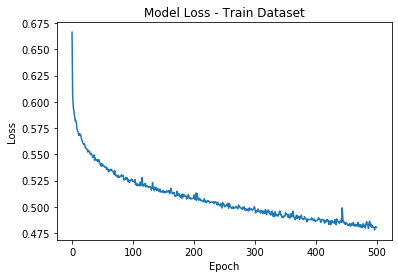

In [55]:
# Graph model loss
plt.plot(model.history["loss"])
plt.title("Model Loss - Train Dataset")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()